In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame

In [2]:
def plot_histograms(dt:DataFrame):
    default_par = dict(
        color="#a74e25",
        edgecolor="#5b2a14"
    )
    
    labels = dt["labels"].tolist()
    w_score = dt["w_score"].tolist()
    
    distri_labels = [labels.count(i) for i in range(max(labels)+1)]
    name_label = [*range(max(labels)+1)]
    
    _, axs = plt.subplots(ncols=3,figsize=(18,4))
    
    axs[0].hist(w_score, **default_par)
    axs[0].grid(color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
    axs[0].set_title('Distribution of w_score ')
    axs[0].set_xlabel('w_score')
    axs[0].set_ylabel('Frequency')
    
    axs[1].bar(name_label,distri_labels, **default_par)
    axs[1].grid(color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
    axs[1].set_title('Distribution of labels')
    axs[1].set_xlabel('Labels')
    axs[1].set_ylabel('Frequency')
    
    axs[2].bar(name_label,distri_labels, **default_par)
    axs[2].set_ylim(0, 600)
    axs[2].grid(color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
    axs[2].set_title('Distribution of labels - zoom')
    axs[2].set_xlabel('Labels')
    axs[2].set_ylabel('Frequency')
    
    plt.show()

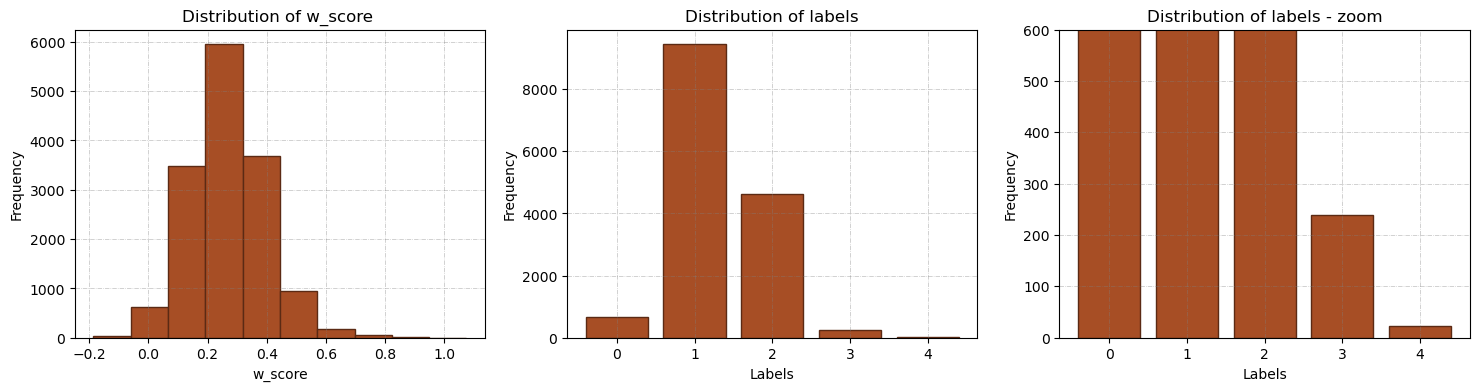

In [3]:
score_dt = pd.read_csv("../outputs/scores/scores.csv")
plot_histograms(score_dt)7

In [26]:
class1 = score_dt[score_dt["labels"]==1].sample(frac=0.50).index
class2 = score_dt[score_dt["labels"]==2].sample(frac=0.0).index
rebalanced_dt = score_dt.drop(class1).drop(class2)

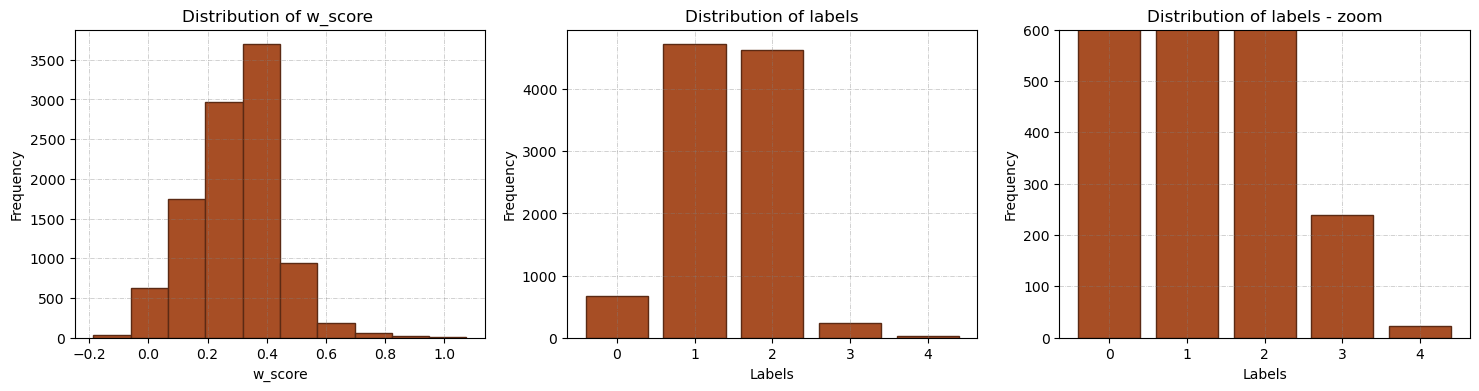

In [27]:
plot_histograms(rebalanced_dt)

In [28]:
from sklearn.model_selection import train_test_split
from  Generator.parameters import matching_par

train, test = train_test_split(rebalanced_dt, test_size=matching_par["split_size"][0],
                               random_state=matching_par["split_seed"])
train, valid = train_test_split(train, test_size=matching_par["split_size"][1], random_state=matching_par["split_seed"])

rebalanced_dt.to_csv(f"../outputs/bal_scores/scores.csv",index=False)
train.to_csv(f"../outputs/bal_scores/scores_tr.csv", index=False)
valid.to_csv(f"../outputs/bal_scores/scores_vl.csv", index=False)
test.to_csv(f"../outputs/bal_scores/scores_ts.csv", index=False)